In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2
import random

In [4]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [15]:
randomIdx = []

def randomNum():
    num = random.randint(0,(len(df)-1))
    while num in randomIdx:
        num = randomNum()
    return num

for i in range(1000):
    num = randomNum()
    randomIdx.append(num)
    

In [19]:
testDF = {}
testDF = pd.DataFrame(testDF)
for i in range(len(df)):
    if i in randomIdx:
        testDF = pd.concat([testDF, df.iloc[i]], ignore_index=True)
        
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       11000 non-null  object
dtypes: object(1)
memory usage: 86.1+ KB


In [4]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of the Earth in kilometers (you can change it to miles if needed)
    radius_earth_km = 6371.0

    # Calculate the distance
    distance = radius_earth_km * c

    return distance

In [5]:
# Example coordinates (latitude and longitude) for two points
latitude1, longitude1 = 40.767937, -73.982155
latitude2, longitude2 = 40.765602, -73.964630

# Calculate the distance
distance_km = haversine_distance(latitude1, longitude1, latitude2, longitude2)

print(f"The distance between the two points is {distance_km:.2f} kilometers.")

The distance between the two points is 1.50 kilometers.


In [6]:
for i in range(5000):
    latitude1, longitude1 = df_test.at[i, 'pickup_latitude'], df_test.at[i, 'pickup_longitude']
    latitude2, longitude2 = df_test.at[i, 'dropoff_latitude'], df_test.at[i, 'dropoff_longitude']
    
    distance_km = round(haversine_distance(latitude1, longitude1, latitude2, longitude2), 2)
    totalDistAndTime.at[i, 'distance'] = distance_km
    totalDistAndTime.at[i, 'time'] = float(df_test.at[i, 'trip_duration']/60)

In [7]:
for i in range(len(totalDistAndTime)):
    if totalDistAndTime.loc[i, 'time'] > 500:
        totalDistAndTime = totalDistAndTime.drop(i)

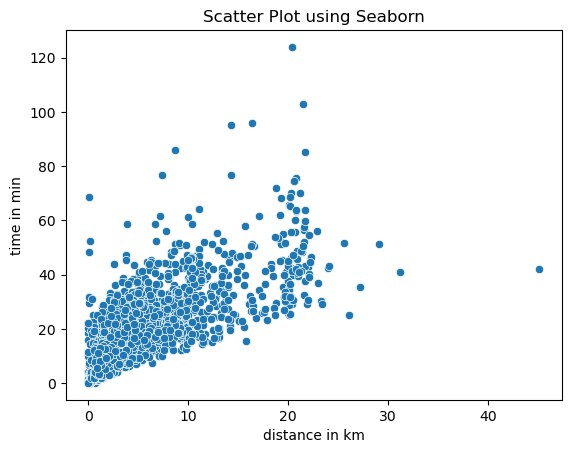

In [8]:
sns.scatterplot(x=totalDistAndTime['distance'], y=totalDistAndTime['time'])

# Set labels and title
plt.xlabel('distance in km')
plt.ylabel('time in min')
plt.title('Scatter Plot using Seaborn')

# Show the plot
plt.show()